### Data Prepararion

In [71]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('data/breast-cancer/wdbc.data', header=None)
bc_data = df.iloc[:, 2:].values
bc_target = df.iloc[:, 1].values
print('breast cancer data: {}'.format(bc_data.shape))
print('breast cancer target: {}'.format(bc_target.shape))

breast cancer data: (569, 30)
breast cancer target: (569,)


---
* Transform data target to binary labels

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bc_target = le.fit_transform(bc_target)
print('breast cancer target: {}'.format(bc_target.shape))

breast cancer target: (569,)


In [73]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc_data, bc_target, 
                                    test_size=0.3, random_state=0)

### Binary Classification Via Perceptron

In [74]:
from sklearn.linear_model import Perceptron
percep = Perceptron()
percep.fit(X_train, y_train)
y_pred = percep.predict(X_test)

---
* Classification Report

In [75]:
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.99      0.93       108
          1       0.98      0.76      0.86        63

avg / total       0.91      0.91      0.90       171



---
* ROC Curve

In [76]:
def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

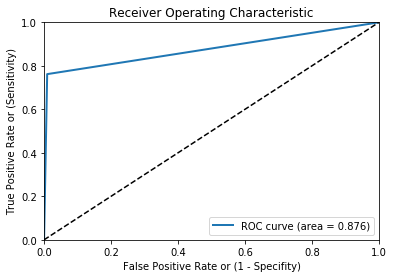

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

---
* Precision-Recall-Curve

In [78]:
def plot_pr_curve(precision, recall, ap):
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(ap))

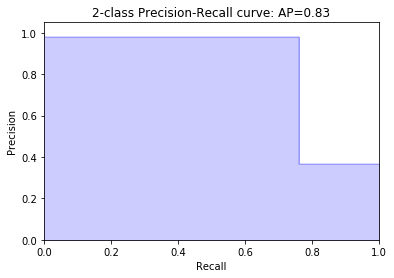

In [79]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
ap = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plot_pr_curve(precision, recall, ap)

### Binary Classification Via AdaLine

In [82]:
from mlxtend.classifier import Adaline
from sklearn.metrics import classification_report
ada = Adaline()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       108
          1       1.00      0.92      0.96        63

avg / total       0.97      0.97      0.97       171



### Other Methods
Logistic Regression, SVM, Decision Tree and so on, can all be used to do binary classification. I will not repeat doing the same work as you can find those methods in multi-classification notebook.